Artificial Intelligence-Enabled Exploratory Cyber-Physical Safety Analyzer Framework for Civilian Urban Air Mobility 

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from pandas.plotting import scatter_matrix
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pandas.plotting import scatter_matrix
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# merging three csv files
df = pd.concat(
    map(pd.read_csv, ['/content/ace-benign-log_0_2033-8-19-16-27-30_vehicle_attitude_0.csv', '/content/ace-jamming-log_1_2033-8-19-16-46-46_vehicle_attitude_0.csv','/content/ace-spoo f ing-hackr f -log_5_2033-8-19-17-14-18_vehicle_attitude_0.csv']), ignore_index=True)
print(df)
col_name_list = list(df.columns)
print("col_name_list = ", col_name_list)
size_col_name_list = len(col_name_list)
print("size_col_name_list = ", size_col_name_list)

       timestamp  reference  roll/longitudinal  pitch/transverse  \
0      615353198  -0.339362          -0.010515         -0.001514   
1      615358202  -0.339364          -0.010517         -0.001514   
2      615403188  -0.339807          -0.010541         -0.001524   
3      615458179  -0.339757          -0.010254         -0.001497   
4      615508170  -0.339056          -0.010166         -0.001564   
...          ...        ...                ...               ...   
12078  394949440  -0.174220           0.115209         -0.977572   
12079  394999457  -0.174310           0.114898         -0.977597   
12080  395054416  -0.174412           0.114565         -0.977624   
12081  395099400  -0.174498           0.114292         -0.977644   
12082  395149388  -0.174588           0.113983         -0.977668   

       yaw/vertical  reference_change   roll_change  pitch_change  yaw_change  \
0          0.940596          1.000000  2.230000e-11 -8.210000e-10    0.000475   
1          0.940595  

In [ ]:
#Count the number of rows and columns
df.shape

(12083, 10)

In [ ]:
#Get a count of number of attack
df['attack'].value_counts()

1    7159
0    4924
Name: attack, dtype: int64

In [ ]:
# Apply label Encoder to convert into numerical value

labelencoder = LabelEncoder()
df['reference'] = labelencoder.fit_transform(df['reference'])
df['roll/longitudinal'] = labelencoder.fit_transform(df['roll/longitudinal'])
df['pitch/transverse'] = labelencoder.fit_transform(df['pitch/transverse'])
df['yaw/vertical'] = labelencoder.fit_transform(df['yaw/vertical'])
df['reference_change'] = labelencoder.fit_transform(df['reference_change'])
df['roll_change'] = labelencoder.fit_transform(df['roll_change'])
df['pitch_change'] = labelencoder.fit_transform(df['pitch_change'])
df['yaw_change'] = labelencoder.fit_transform(df['yaw_change'])

#Converted to float
df['timestamp'] = df['timestamp'].replace(" ", 0).astype('float64')
df['timestamp'] = df['timestamp'].astype(float)

df['attack'] = df['attack'].replace(" ", 0).astype('float64')
df['attack'] = df['attack'].astype(float)
print (df)

         timestamp  reference  roll/longitudinal  pitch/transverse  \
0      615353198.0       7481               2441              6089   
1      615358202.0       7480               2439              6088   
2      615403188.0       7471               2435              6082   
3      615458179.0       7473               2490              6100   
4      615508170.0       7497               2509              6055   
...            ...        ...                ...               ...   
12078  394949440.0      11921              11914                 7   
12079  394999457.0      11919              11913                 6   
12080  395054416.0      11918              11910                 5   
12081  395099400.0      11917              11908                 4   
12082  395149388.0      11916              11907                 3   

       yaw/vertical  reference_change  roll_change  pitch_change  yaw_change  \
0              7635                 2            1             0           0   

Correlation matrix: 
                   timestamp  reference  roll/longitudinal  pitch/transverse  \
timestamp           1.000000  -0.603566          -0.113751          0.053759   
reference          -0.603566   1.000000          -0.014308         -0.081474   
roll/longitudinal  -0.113751  -0.014308           1.000000         -0.116787   
pitch/transverse    0.053759  -0.081474          -0.116787          1.000000   
yaw/vertical       -0.563298   0.919012          -0.080338         -0.014270   
reference_change    0.911823  -0.488241          -0.131368          0.074724   
roll_change         0.097007   0.494093          -0.150558          0.021231   
pitch_change       -0.911823   0.488241           0.131368         -0.074724   
yaw_change         -0.911823   0.488241           0.131368         -0.074724   
attack             -0.908669   0.766852           0.060801         -0.067647   

                   yaw/vertical  reference_change  roll_change  pitch_change  \
timestamp         

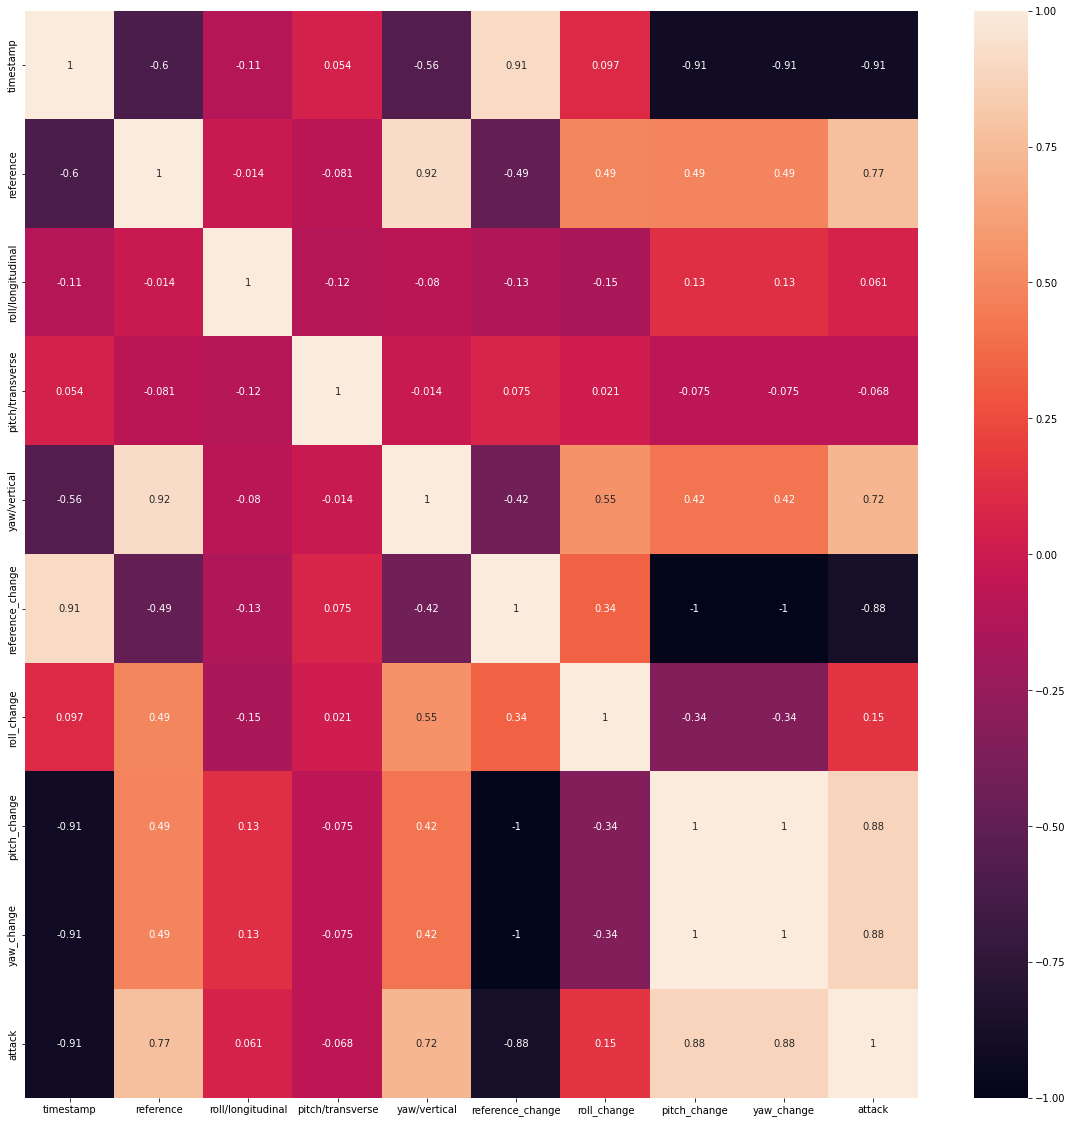

In [ ]:
# Exploratory Data Analysis (EDA)

#correlation matrix heatmap for the data set
f, ax = plt.subplots(figsize=(20, 20))
corr_var = df.corr()
print("Correlation matrix: ")
print(corr_var) 

print("Correlation matrix visualization: ")
sns.heatmap(corr_var, annot = True)

Individual numerical features analysis with attack


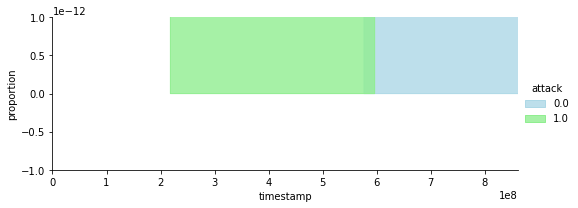

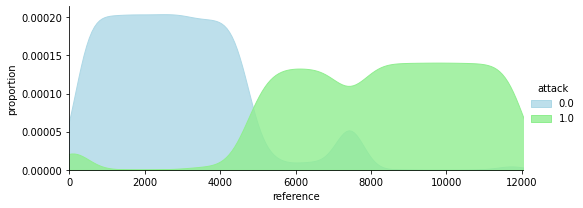

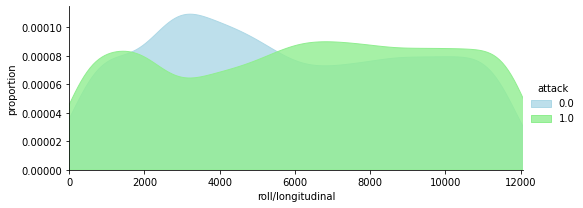

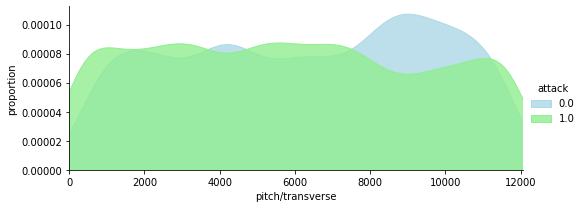

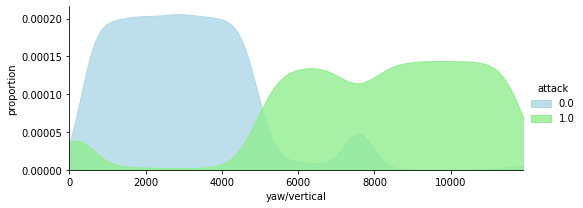

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


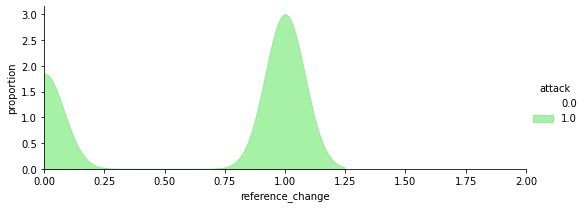

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


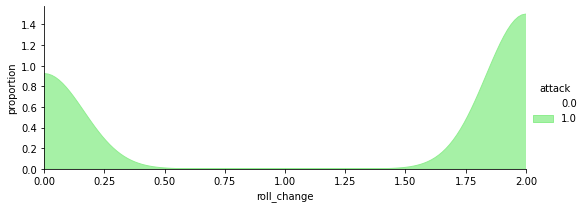

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


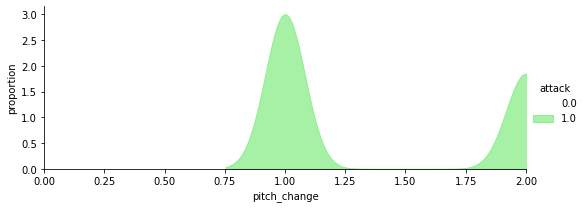

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


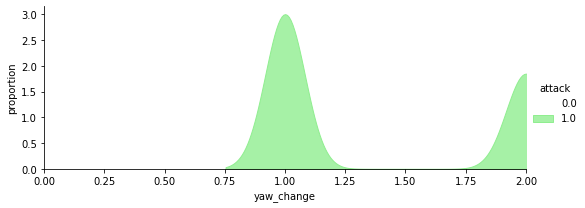

In [ ]:
#Numerical features analysis
def plot_dis_number (ds_list):
    g = sns.FacetGrid(df, hue = "attack", aspect = 2.5, palette={1:"lightgreen", 0:"lightblue"})
    g = g.map(sns.kdeplot,ds_list, shade = True, alpha = 0.8 )
    g.set(xlim = (0, df[ds_list].max()))
    g.add_legend()
    g.set_axis_labels(ds_list, "proportion")
    plt.show()
print("Individual numerical features analysis with attack")
plot_dis_number("timestamp")
plot_dis_number("reference")
plot_dis_number("roll/longitudinal")
plot_dis_number("pitch/transverse")
plot_dis_number("yaw/vertical")
plot_dis_number("reference_change")
plot_dis_number("roll_change")
plot_dis_number("pitch_change")
plot_dis_number("yaw_change")

In [ ]:
X = df.drop(labels = ["attack"],axis = 1)
Y = df["attack"].values
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

mean_vec = np.mean(X_train_std, axis=0)
cov_mat = (X_train_std - mean_vec).T.dot((X_train_std - mean_vec)) / (X_train_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)

#Best parameter search for 4 models
models = [('knn', KNN), 
          ('logistic', LogisticRegression),
          ('tree', DecisionTreeClassifier),
          ('forest', RandomForestClassifier)
         ]

param_choices = [
    {
        'n_neighbors': range(1, 12)
    },
    {
        'C': np.logspace(-3,6, 12),
        'penalty': ['l1', 'l2']
    },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]


grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params)
    grid.fit(X_train, y_train)
    s = grid.best_params_
    print("Score ", grid.best_score_)
    print(s)
    grids[name] = grid
    print(grids[name])

Covariance matrix 
[[ 1.00010347 -0.60202303 -0.11396885  0.05646794 -0.55955842  0.91201044
   0.09790836 -0.91201044 -0.91201044]
 [-0.60202303  1.00010347 -0.01394933 -0.08181367  0.91465645 -0.48854175
   0.48998038  0.48854175  0.48854175]
 [-0.11396885 -0.01394933  1.00010347 -0.1136908  -0.08502315 -0.13173246
  -0.15233964  0.13173246  0.13173246]
 [ 0.05646794 -0.08181367 -0.1136908   1.00010347 -0.0116709   0.0744896
   0.0234688  -0.0744896  -0.0744896 ]
 [-0.55955842  0.91465645 -0.08502315 -0.0116709   1.00010347 -0.41352888
   0.55390448  0.41352888  0.41352888]
 [ 0.91201044 -0.48854175 -0.13173246  0.0744896  -0.41352888  1.00010347
   0.34271948 -1.00010347 -1.00010347]
 [ 0.09790836  0.48998038 -0.15233964  0.0234688   0.55390448  0.34271948
   1.00010347 -0.34271948 -0.34271948]
 [-0.91201044  0.48854175  0.13173246 -0.0744896   0.41352888 -1.00010347
  -0.34271948  1.00010347  1.00010347]
 [-0.91201044  0.48854175  0.13173246 -0.0744896   0.41352888 -1.00010347
  -0

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver 

Score  0.4084419575960124
{'C': 0.001, 'penalty': 'l2'}
GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 6.57933225e-03, 4.32876128e-02, 2.84803587e-01,
       1.87381742e+00, 1.23284674e+01, 8.11130831e+01, 5.33669923e+02,
       3.51119173e+03, 2.31012970e+04, 1.51991108e+05, 1.00000000e+06]),
                         'penalty': ['l1', 'l2']})
Score  1.0
{'max_depth': 1, 'min_samples_leaf': 3}
GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [3, 6, 10]})
Score  1.0
{'max_depth': 1, 'min_samples_leaf': 3, 'n_estimators': 50}
GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [3, 6, 10],
                         'n_estimators': [50, 100, 200]})


[[ 976    0]
 [   0 1441]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       976
         1.0       1.00      1.00      1.00      1441

    accuracy                           1.00      2417
   macro avg       1.00      1.00      1.00      2417
weighted avg       1.00      1.00      1.00      2417

1.0


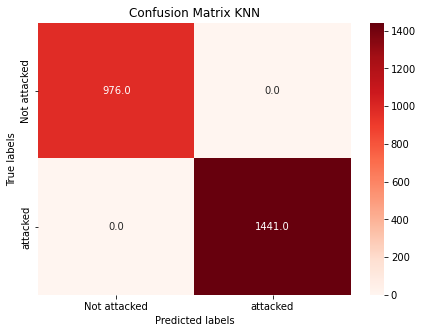

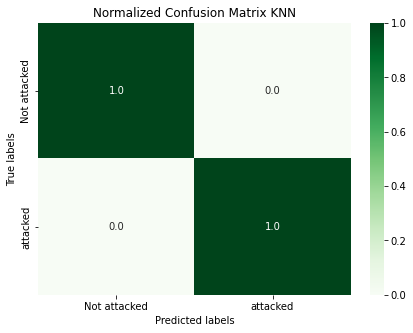

In [ ]:
#KNN model
knn = KNeighborsClassifier()
k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# scalarizing X_train and X_test
scaler = StandardScaler()  
scaler.fit(X_train)
X_train_scl = scaler.transform(X_train)  
X_test_scl = scaler.transform(X_test)

#fit the grid
grid.fit(X_train, y_train)


knn = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors=79, weights='uniform')
knn.fit(X_train, y_train)


# #Model Evaluation
y_pred_knn=knn.predict(X_test)
cm_knn=confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

print(classification_report(y_test, y_pred_knn))

knn_precision, knn_recall, _ = precision_recall_curve(y_test, y_pred_knn)

y_pred_knn=knn.predict(X_test)
y_score_knn = knn.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn,_ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
print(roc_auc_knn)

labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_knn,cmap="Reds",annot=True,fmt='.1f', ax = ax); 
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix KNN');


cm_knn_nor = cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis]
labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_knn_nor,cmap="Greens", annot=True,fmt='.1f', ax = ax); 
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Normalized Confusion Matrix KNN');

[[ 976    0]
 [1441    0]]
              precision    recall  f1-score   support

         0.0       0.40      1.00      0.58       976
         1.0       0.00      0.00      0.00      1441

    accuracy                           0.40      2417
   macro avg       0.20      0.50      0.29      2417
weighted avg       0.16      0.40      0.23      2417

1.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


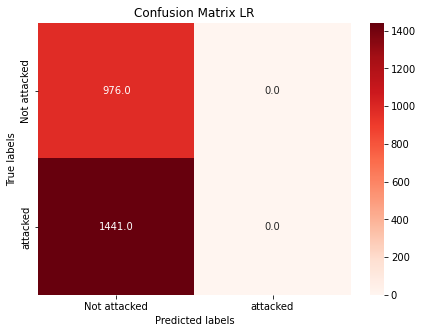

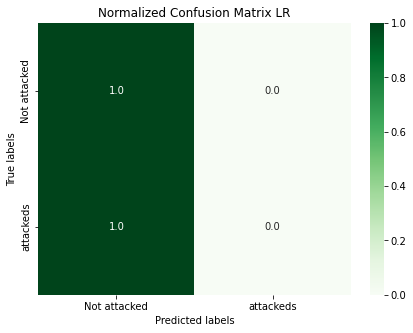

In [ ]:
#Logistic Regression Model
best_lr = LogisticRegression(C=0.8)
best_lr.fit(X_train, y_train)
y_pred_log = best_lr.predict(X_test)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix_log)
print(classification_report(y_test, y_pred_log))

lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_log)

y_pred_log=best_lr.predict(X_test)
y_score_log = best_lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr,_ = roc_curve(y_test, y_score_log)
roc_auc_log = auc(fpr_lr, tpr_lr)
print(roc_auc_log)


labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_log,cmap="Reds",annot=True,fmt='.1f', ax = ax); 
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix LR');


confusion_matrix_log_nor = confusion_matrix_log.astype('float') / confusion_matrix_log.sum(axis=1)[:, np.newaxis]
labels = ['Not attacked', 'attackeds']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_log_nor,cmap="Greens", annot=True,fmt='.1f', ax = ax); 
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Normalized Confusion Matrix LR');

[[ 976    0]
 [   0 1441]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       976
         1.0       1.00      1.00      1.00      1441

    accuracy                           1.00      2417
   macro avg       1.00      1.00      1.00      2417
weighted avg       1.00      1.00      1.00      2417

1.0


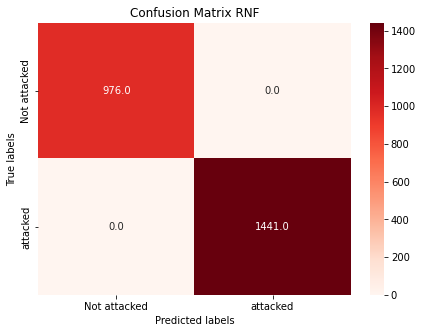

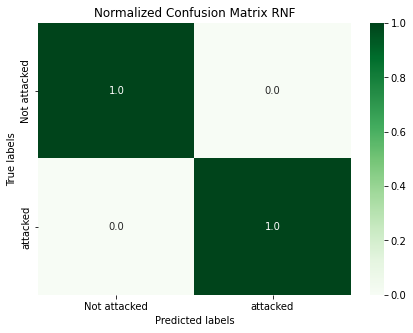

In [ ]:
#Random forests
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc=RandomForestClassifier(random_state=42)
rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfc.fit(X_train, y_train)
rfc_best=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 50, max_depth=8, criterion='gini')
rfc_best.fit(X_train, y_train)
y_pred_rfc=rfc_best.predict(X_test)

confusion_matrix_forest = confusion_matrix(y_test, y_pred_rfc)
print(confusion_matrix_forest)
print(classification_report(y_test, y_pred_rfc))

rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_pred_rfc)

# Model Evaluation
y_pred_rfc=rfc_best.predict(X_test)
y_score_rfc = rfc_best.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf,_ = roc_curve(y_test, y_score_rfc)
roc_auc_forests = auc(fpr_rf, tpr_rf)
print(roc_auc_forests)

labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_forest,cmap="Reds",annot=True,fmt='.1f', ax = ax); 
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix RNF');


confusion_matrix_forest_nor = confusion_matrix_forest.astype('float') / confusion_matrix_forest.sum(axis=1)[:, np.newaxis]
labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_forest_nor,cmap="Greens", annot=True,fmt='.1f', ax = ax); 
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Normalized Confusion Matrix RNF');

1.0
{'max_depth': 1, 'min_samples_leaf': 3}
DecisionTreeClassifier(max_depth=1, min_samples_leaf=3)
[[ 976    0]
 [   0 1441]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       976
         1.0       1.00      1.00      1.00      1441

    accuracy                           1.00      2417
   macro avg       1.00      1.00      1.00      2417
weighted avg       1.00      1.00      1.00      2417

1.0


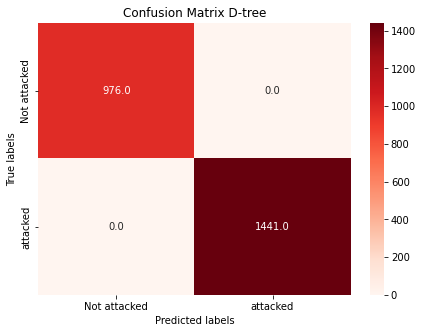

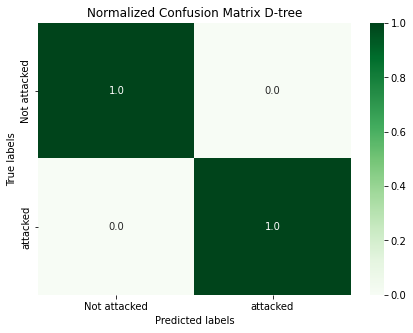

In [ ]:
#Decision Tree Classifier Model
param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [3, 6, 10]}
dtree_model=DecisionTreeClassifier()
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=10)
dtree_model_final= dtree_gscv.fit(X_train, y_train)

print(dtree_model_final.best_score_)
print(dtree_model_final.best_params_)
print(dtree_model_final.best_estimator_)

y_pred_tree = dtree_model_final.predict(X_test)
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix_tree)
print(classification_report(y_test, y_pred_tree))

dt_precision, dt_recall, _ = precision_recall_curve(y_test, y_pred_tree)

y_score_tree = dtree_model_final.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt,_ = roc_curve(y_test, y_score_tree)
roc_auc_tree = auc(fpr_dt, tpr_dt)
print(roc_auc_tree)


labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_tree,cmap="Reds",annot=True,fmt='.1f', ax = ax); 
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix D-tree');


confusion_matrix_tree_nor = confusion_matrix_tree.astype('float') / confusion_matrix_tree.sum(axis=1)[:, np.newaxis]
labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_tree_nor,cmap="Greens", annot=True,fmt='.1f', ax = ax); 
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Normalized Confusion Matrix D-tree');

(9666, 9) (9666,) (2417, 9) (2417,)
         timestamp  reference  roll/longitudinal  pitch/transverse  \
9218   548598681.0      11901               1174              8479   
6779   426647577.0       8828               5793              5229   
8367   506049583.0      11191               8134              5843   
10220  302049824.0       6579               8347              3994   
9060   540695763.0      11169               1169             11367   
...            ...        ...                ...               ...   
599    645257901.0        348               7474              9082   
5695   372447415.0       7878               3746              9172   
8006   487998970.0       8781              10077              2878   
1361   683355447.0       2854               7140              1960   
1547   692658466.0        643              10663             11402   

       yaw/vertical  reference_change  roll_change  pitch_change  yaw_change  
9218          11894                 1       

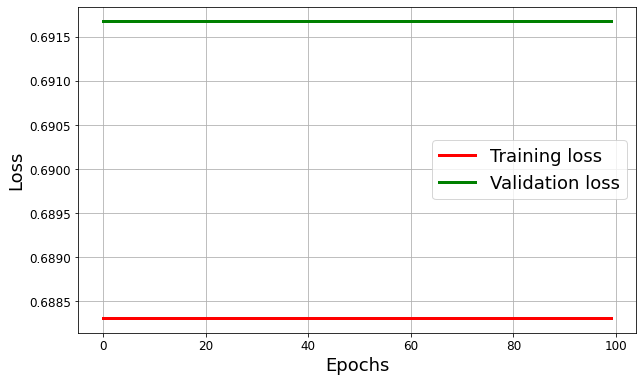

In [ ]:
#Single LSTM Model
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train)

X_train = X_train.values
X_test = X_test.values

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# design network
model_lstm = Sequential()
print("X_train.shape[0] ", X_train.shape[0])
model_lstm.add(LSTM(50, input_shape=(X_train.shape[1],X_train.shape[2])))
model_lstm.compile(loss='mae', optimizer='adam')
# fit network
history = model_lstm.fit(X_train, y_train, epochs=100, batch_size=155, validation_data=(X_test, y_test), verbose=2, shuffle=False)


#Output display
training_loss = history.history['loss']
print("Training Loss :", training_loss)

validation_loss = history.history['val_loss']
print("Validation Loss :", validation_loss)

t = np.arange(0, 110, 10)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot( training_loss, color='r',  lw=3.0, label='Training loss')
ax.plot(validation_loss, color='g', lw=3.0, label='Validation loss')
plt.ylabel('Loss', fontsize = 18)
plt.xlabel('Epochs', fontsize = 18)
plt.legend(loc='best',fontsize = 18)
ax.grid(True)
ticklines = ax.get_xticklines() + ax.get_yticklines()
gridlines = ax.get_xgridlines()
ticklabels = ax.get_xticklabels() + ax.get_yticklabels()

for line in ticklines:
    line.set_linewidth(3)

for line in gridlines:
    line.set_linestyle('-')

for line in gridlines:
    line.set_linestyle('-')

for label in ticklabels:
    label.set_color('black')
    label.set_fontsize('large')

plt.show()

76/76 [==============================] - 1s 2ms/step
Accuracy LSTM  0.4038063715349607
Test RMSE: 0.772
Confusion Matrix New:
[[ 976    0]
 [1441    0]]


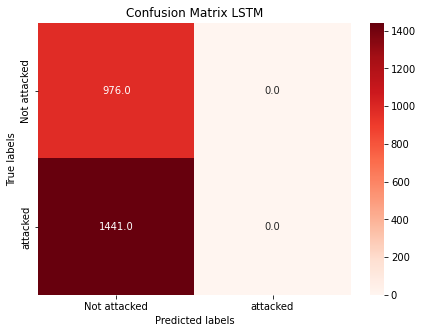

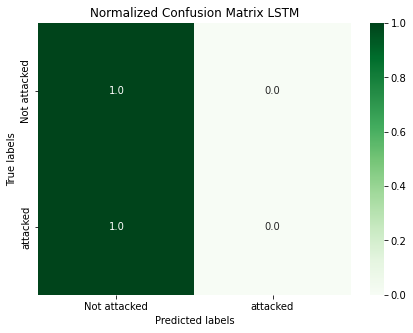

In [ ]:
# LSTM Model Evaluation
yhat = model_lstm.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))

final_yhat =yhat
final_yhat_list = []
ii = 0
for yhat_val in final_yhat:
    if yhat_val[0] >= 0.5:
        final_yhat_list.append(1)
    else:
        final_yhat_list.append(0)
    ii+=1
    
    
# print("final_yhat_list len :", len(final_yhat_list))

print ("Accuracy LSTM ",metrics.accuracy_score(y_test, final_yhat_list))

# calculate RMSE
rmse_new = sqrt(mean_squared_error(y_test, final_yhat_list))
print('Test RMSE: %.3f' % rmse_new)

confmat = confusion_matrix(y_true=y_test, y_pred=final_yhat_list)
print("Confusion Matrix New:")
print(confmat)

labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confmat,cmap="Reds",annot=True,fmt='.1f', ax = ax); 
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix LSTM');


confmat_nor = confmat.astype('float') / confmat.sum(axis=1)[:, np.newaxis]
labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confmat_nor,cmap="Greens", annot=True,fmt='.1f', ax = ax); 
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Normalized Confusion Matrix LSTM');